In [314]:
#import libraries
import pandas as pd
import plotly.graph_objs as go
import plotly.express as px
import plotly.io as pio
pio.templates.default = "plotly_white"

In [316]:
#read the dataset
data = pd.read_csv(r"C:\Users\user\Downloads\customer_acquisition_data.csv")
data.head()

,customer_id,channel,cost,conversion_rate,revenue
0,1,referral,8.320327,0.123145,4199
1,2,paid advertising,30.450327,0.016341,3410
2,3,email marketing,5.246263,0.043822,3164
3,4,social media,9.546326,0.167592,1520
4,5,referral,8.320327,0.123145,2419


In [318]:
#check rows and columns
data.shape

(800, 5)

In [320]:
#check data type
data.dtypes

customer_id          int64
channel             object
cost               float64
conversion_rate    float64
revenue              int64
dtype: object

### We visualize the distribution of acquisition cost and revenue generated by the customer using histogram

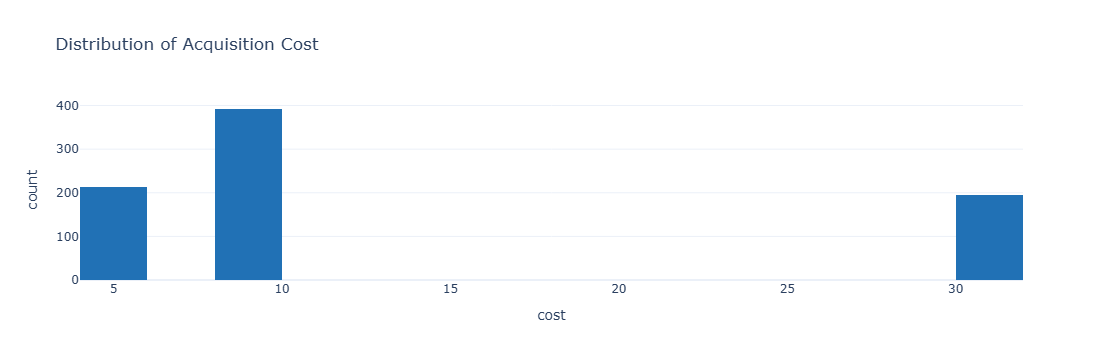

In [353]:
fig = px.histogram(data,
                   x="cost",
                   nbins=20,
                   title='Distribution of Acquisition Cost')

fig.update_traces(marker_color= '#2171b5')  

fig.show()

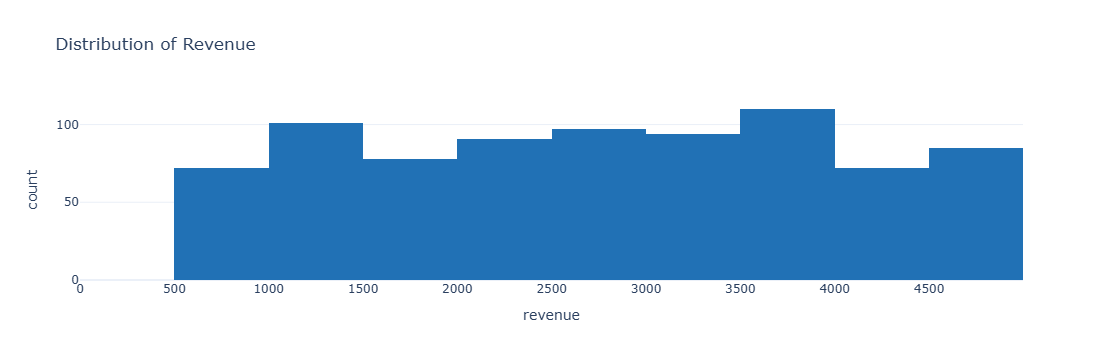

In [324]:
fig = px.histogram(data,
                   x = "revenue",
                   nbins = 20,
                   title = 'Distribution of Revenue')

fig.update_xaxes(range=[0, fig.data[0].x.max()], showline=False, zeroline=False)

fig.update_traces(marker_color= '#2171b5')  

fig.show()

## Let's compare the cost of acquisition across different channels anf identify the most and least profitable channels:

In [327]:
cost_by_channel = data.groupby('channel')['cost'].mean().reset_index()

In [329]:
cost_by_channel

,channel,cost
0,email marketing,5.246263
1,paid advertising,30.450327
2,referral,8.320327
3,social media,9.546326


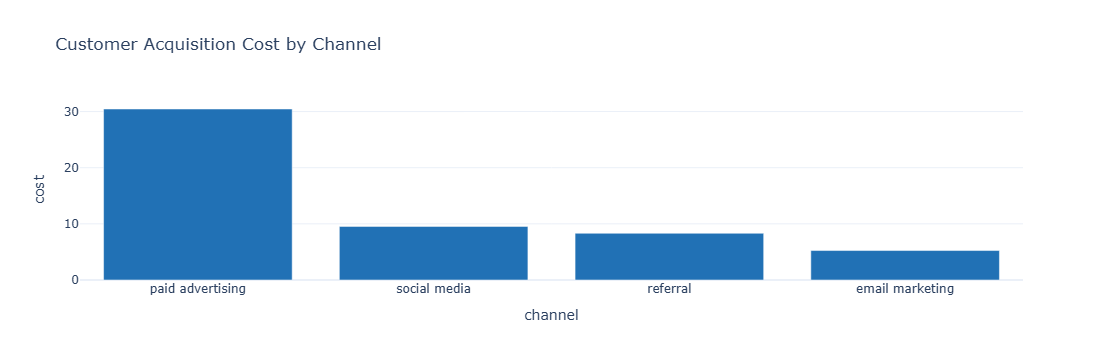

In [332]:
# Sort the DataFrame by 'cost' in descending order
cost_by_channel = cost_by_channel.sort_values('cost', ascending=False)

# Create bar chart 
fig = px.bar(
    cost_by_channel,
    x="channel",
    y="cost",
    title='Customer Acquisition Cost by Channel'
)

fig.update_traces(marker_color= '#2171b5')  

fig.show()


## We check which channels are most and least effective for converting customers:

In [335]:
conversion_by_channel = data.groupby('channel')['conversion_rate'].sum().reset_index()

In [337]:
conversion_by_channel

,channel,conversion_rate
0,email marketing,9.377957
1,paid advertising,3.170249
2,referral,25.491011
3,social media,31.004566


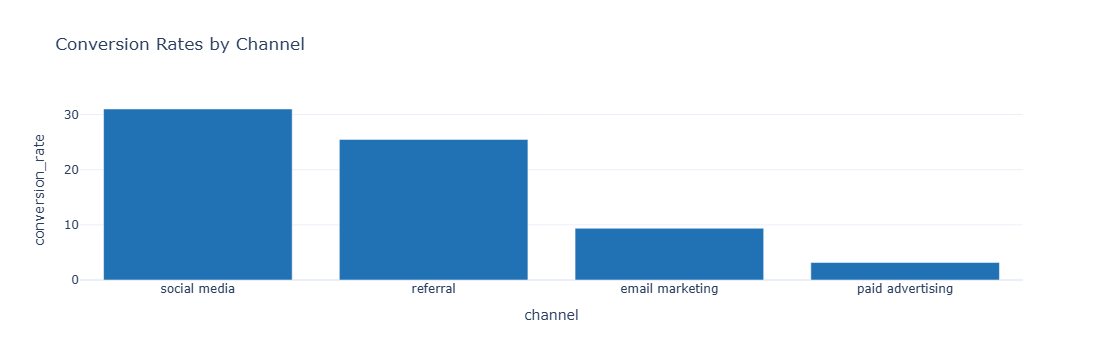

In [339]:
# Sort the DataFrame by conversion_rate in descending order
conversion_by_channel = conversion_by_channel.sort_values('conversion_rate', ascending=False)

# Create bar chart 
fig = px.bar(
    conversion_by_channel,
    x='channel',
    y='conversion_rate',
    title='Conversion Rates by Channel',
)

fig.update_traces(marker_color= '#2171b5') 

fig.show()


## Calculate the total revenue by channels and check for the most and least profitable channels generating revenue

In [342]:
Revenue_by_channel = data.groupby('channel')['revenue'].sum().reset_index()

In [344]:
Revenue_by_channel

,channel,revenue
0,email marketing,604706
1,paid advertising,548396
2,referral,569552
3,social media,492667


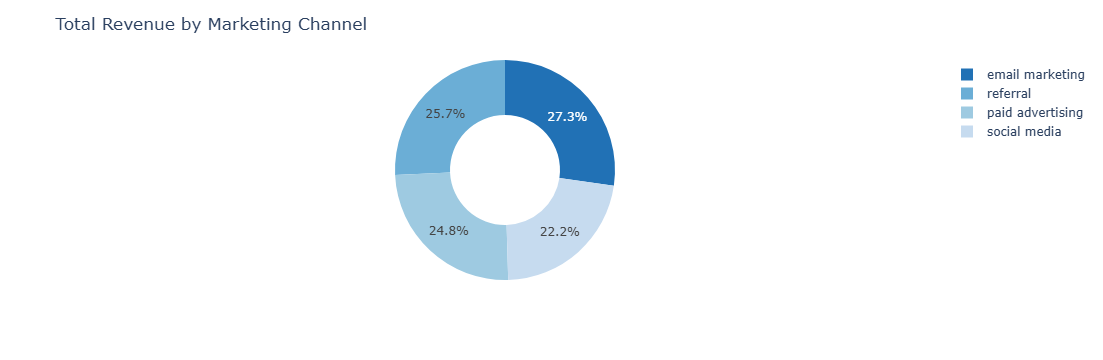

In [346]:
# Define your DataFrame
df = pd.DataFrame({
    'channel': ['email marketing', 'referral', 'paid advertising', 'social media'],
    'revenue': [604706, 569552, 548396, 492667],
    'Color': ['#2171b5','#6baed6', '#9ecae1','#c6dbef']  # Custom colors
})

# Use the same column name for 'names' and color mapping
fig = px.pie(df,
             names='channel',
             values='revenue',
             color='channel',
             hole = 0.5,
             color_discrete_map={
                 row['channel']: row['Color'] for _, row in df.iterrows()
             })

fig.update_layout(title='Total Revenue by Marketing Channel')
fig.show()


In [348]:
#get the return of investment for each channel
data['Return Of Investment'] = data['revenue'] / data['cost']
roi_by_channel = data.groupby('channel')['Return Of Investment'].mean().reset_index()

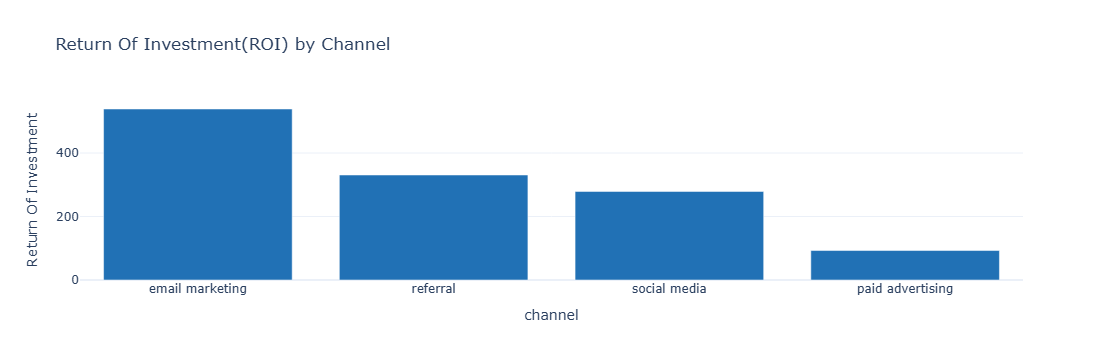

In [350]:

# Sort the DataFrame by conversion_rate in descending order
roi_by_channel = roi_by_channel.sort_values('Return Of Investment', ascending=False)
# Create bar chart 
fig = px.bar(
   roi_by_channel,
    x='channel',
    y='Return Of Investment',
    title='Return Of Investment(ROI) by Channel',
)

fig.update_traces(marker_color= '#2171b5') 

fig.show()